In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram #Used in Frequency Feature

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV,train_test_split # Import train_test_split function


from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


In [2]:
def plot2(eegchannel, leneeg,sfreq, starttime, endtime):
    # eegchannel is the channel of EEG you wish to plot, for example F4-C4
    # leneeg is then length of the eeg file
    # sfreq is the sampling frequency
    # eegtime is the numpy array created that converts the EEG index to seconds, based on the sampling frequency
    # starttime is time in seconds of the start time of the EEG data that you wish to plot
    # endtime is the time in seconds of the end time of the EEG data that you wish to plot 
    eegst=int(sfreq*starttime) # calculate the start eeg index
    eeget=int(sfreq*endtime)# calculate the end eeg index
    eegtime= np.arange(0,leneeg,1)/sfreq 
    fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize=(16,5))
    eeg_trace = ax.plot(eegtime[eegst:eeget+1], eeg.loc[eegst:eeget,eegchannel],color='blue',label='EEG') # Plot EEG Data
    ax.set_ylabel('$\mu V$',color='blue',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax.set_xlabel('Seconds',color='green',fontsize=16) # Set left hand yaxis label to 'Cases'.
    ax2 = ax.twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
    annotations = ax2.plot(channelAnno.loc[starttime:endtime,eegchannel],color='red',label='Seizure') # Plot Annotation data.
    ax2.set_ylabel('Seizure',color='red',fontsize=16) # Set right hand yaxis label to 'Deaths'.
    ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
    ax2.grid() # Plot a grid for the right hand y axis.
    ax2.legend(eeg_trace + annotations, [eegchannel,'Seizure'], fontsize=16, loc='best')
    ax.set_title('EEG and Anotation',fontsize=16) 
    plt.show

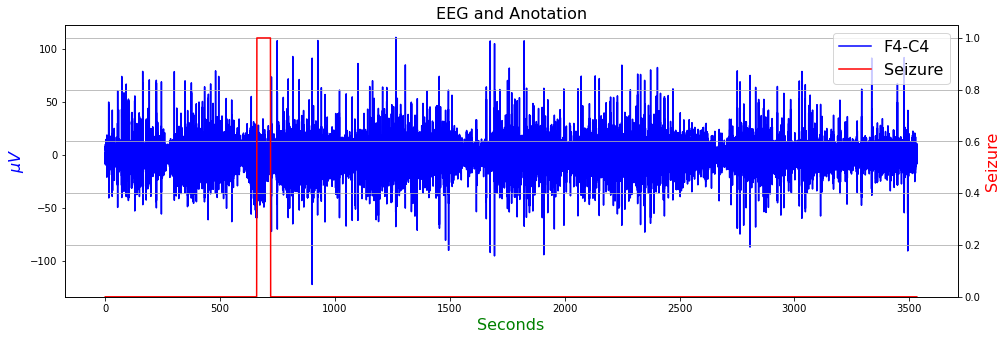

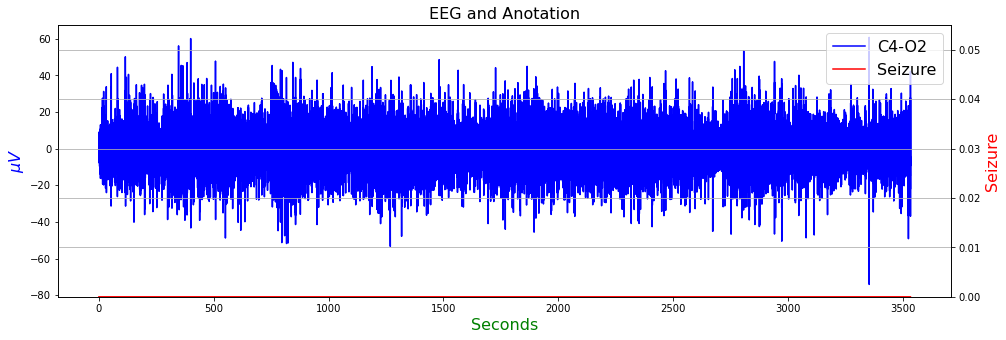

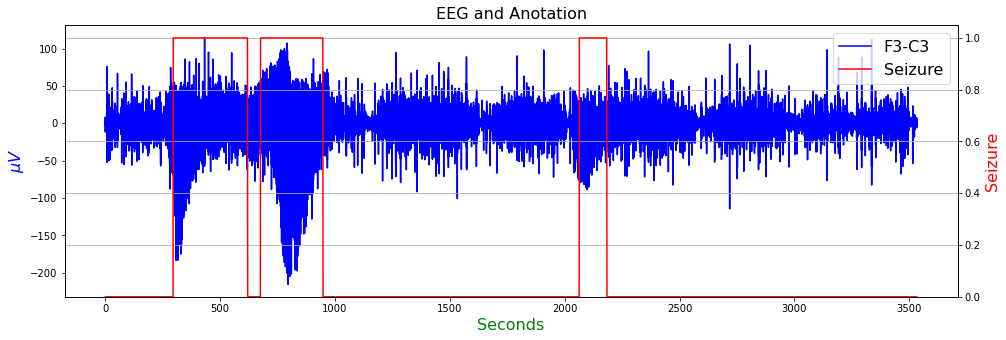

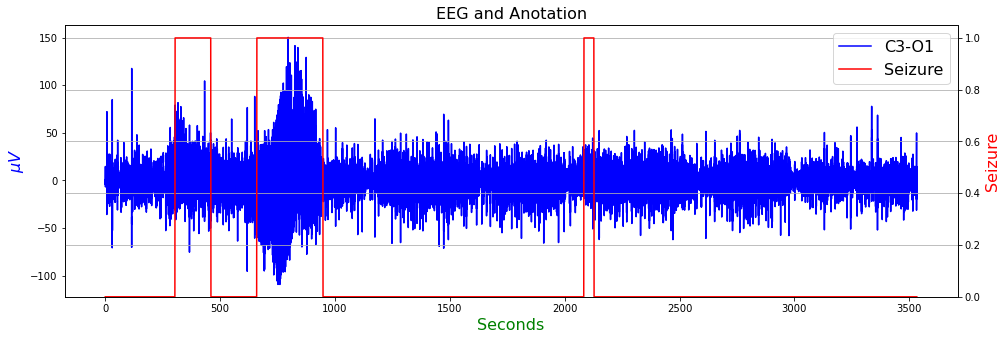

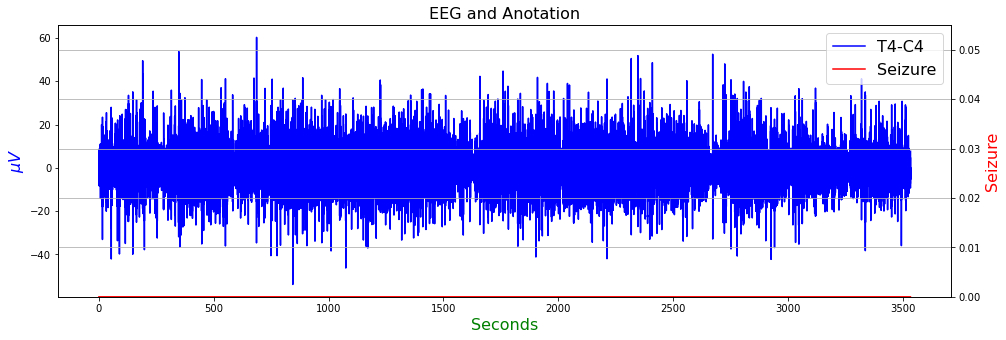

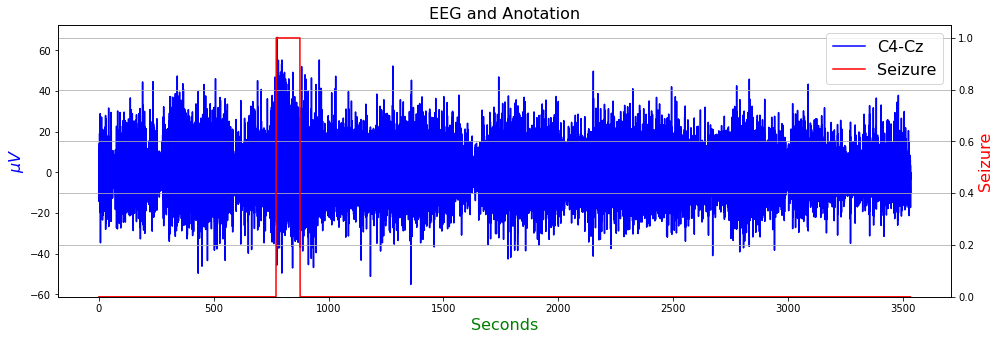

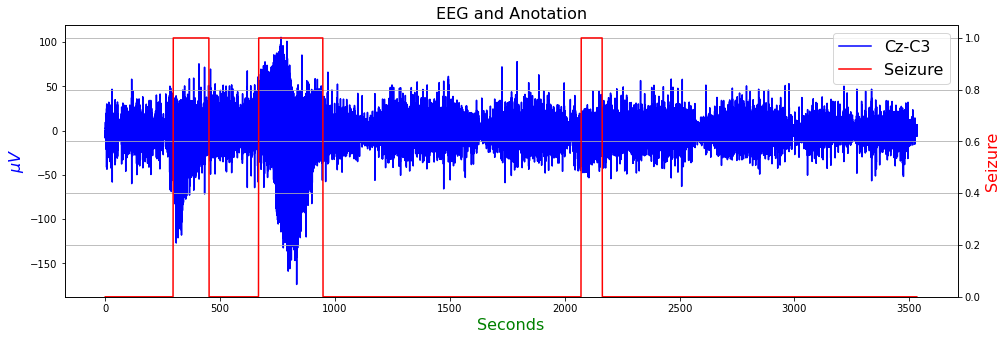

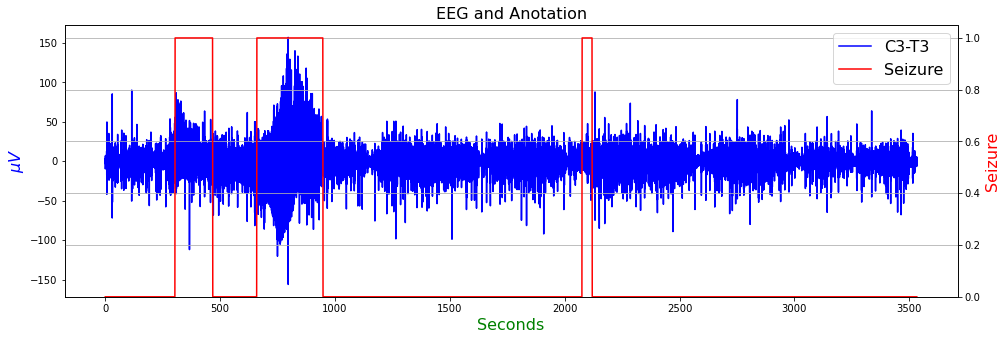

In [3]:
eeg =  pd.read_csv('EEG9_processed.csv')
channelAnno = pd.read_csv('eeg9_Combined_Exper_Annotations.csv').drop("Unnamed: 0",axis = 1)
plot2('F4-C4', len(eeg),32, 0, len(eeg)/32)
plot2('C4-O2', len(eeg),32, 0, len(eeg)/32)
plot2('F3-C3', len(eeg),32, 0, len(eeg)/32)
plot2('C3-O1', len(eeg),32, 0, len(eeg)/32)
plot2('T4-C4', len(eeg),32, 0, len(eeg)/32)
plot2('C4-Cz', len(eeg),32, 0, len(eeg)/32)
plot2('Cz-C3', len(eeg),32, 0, len(eeg)/32)
plot2('C3-T3', len(eeg),32, 0, len(eeg)/32)

In [4]:
eeg.loc[:,"C4-Cz"].to_numpy()

array([ 1.65090683,  2.2772788 ,  1.78185642, ..., -1.46489552,
       -2.87639974, -0.27418893])

In [5]:
eeg

,F4-C4,C4-O2,F3-C3,C3-O1,T4-C4,C4-Cz,Cz-C3,C3-T3
0,1.887922,-1.620295,1.047026,-4.060826,1.101734,1.650907,-0.302366,-1.380142
1,0.985949,-5.521338,-4.923230,-2.474043,5.250998,2.277279,-5.451613,-1.861027
2,1.011332,-5.883657,-5.042618,-2.175349,5.463895,1.781856,-5.766853,-1.507051
3,1.107370,-4.592668,-3.667937,-2.996473,4.663299,3.042621,-4.689177,-2.069705
4,1.425294,-6.300701,-5.902869,-1.474293,5.487804,0.827836,-5.835573,-1.848130
...,...,...,...,...,...,...,...,...
113067,10.769510,16.479184,0.106986,6.202392,-0.252663,-14.086621,0.512820,2.424597
113068,4.908637,-15.637027,-0.092107,7.124224,-4.658679,-1.995848,-1.753141,4.317196
113069,2.878931,-17.005395,0.101585,1.407520,-1.953992,-1.464896,-0.844548,2.882014
113070,4.649306,-9.398800,1.795556,-4.234313,3.009348,-2.876400,-4.340586,-0.780029


In [6]:
channelAnno

,F4-C4,C4-O2,F3-C3,C3-O1,T4-C4,C4-Cz,Cz-C3,C3-T3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
eeg_9 = pd.melt(eeg)
eeg_9_label_combined = pd.melt(channelAnno)
eeg_9_label_combined

,variable,value
0,F4-C4,0.0
1,F4-C4,0.0
2,F4-C4,0.0
3,F4-C4,0.0
4,F4-C4,0.0
...,...,...
28379,C3-T3,0.0
28380,C3-T3,0.0
28381,C3-T3,0.0
28382,C3-T3,0.0


# Line Length

In [8]:
def LLcalculation(N, epoch):
    LL = sum(np.absolute(epoch[i+1]-epoch[i]) for i in range(N-1))
    return LL

In [9]:
NEpoch = 256
Noverlap=128
numberofEpochs = (len(eeg_9)-NEpoch)//(NEpoch-Noverlap) + 1 # Use integer divison // to get exact number of epochs
numberofEpochs

7066

In [10]:
epochstart=0
LL_Feature_9 = np.array([])
for i in range(numberofEpochs):
    Epoch= eeg_9.loc[epochstart:epochstart+NEpoch-1,"value"].to_numpy()
    epochstart += Noverlap
    LL_Feature_9=np.append(LL_Feature_9,LLcalculation(NEpoch, Epoch))

In [11]:
len(LL_Feature_9)

7066

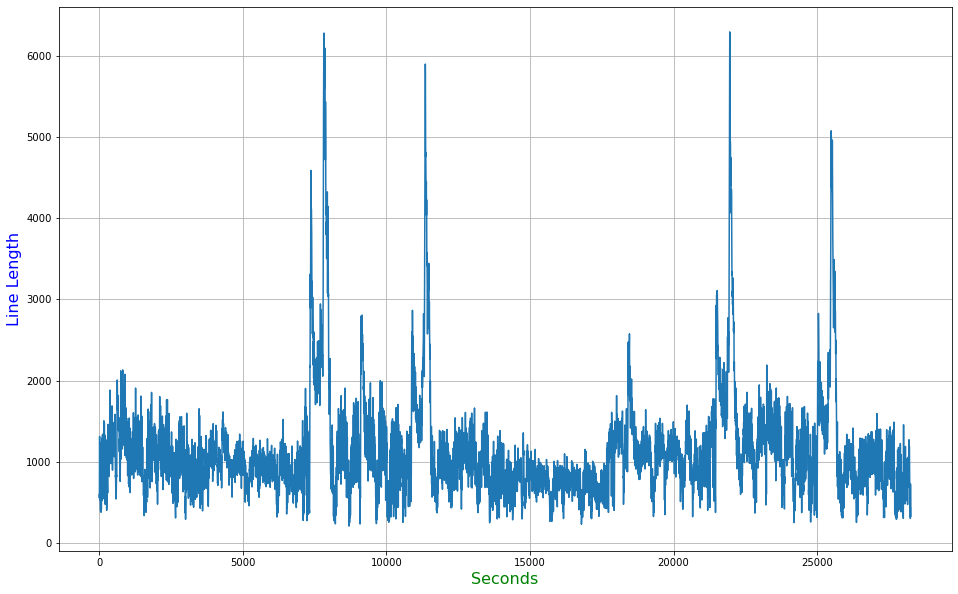

In [12]:
featuretime= np.arange(1,numberofEpochs+1,1)*4 # Converting the Feature index to seconds, ie. a new feature value is generated every 4 seconds.
plt.figure(figsize=(16,10))
plt.plot(featuretime, LL_Feature_9)
plt.ylabel('Line Length', fontsize=16, color='blue')
plt.xlabel('Seconds',color='green',fontsize=16)
plt.grid()
plt.show()

In [13]:
featuretime

array([    4,     8,    12, ..., 28256, 28260, 28264])

In [14]:
eeg_9_label = eeg_9_label_combined.loc[:,"value"][featuretime].to_numpy()

In [15]:
LL_Feature_9_reshaped = (LL_Feature_9.reshape(-1,1))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(LL_Feature_9_reshaped, eeg_9_label, test_size=0.3, random_state=1) # 70% training and 30% test


In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4946, 2120, 4946, 2120)

In [18]:
param_grid = {
    'max_depth': range(1,10)
   
}

dt = DecisionTreeClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dt,param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))

Best hyperparameters:  {'max_depth': 2}
Best accuracy: 0.93
Test set accuracy: 0.94


In [19]:
param_grid = {
    'n_estimators': [1],
    'max_depth': range(1,10)
   
}

rf = RandomForestClassifier()

# Use grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf,param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the model on the test set
accuracy = grid_search.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))

Best hyperparameters:  {'max_depth': 4, 'n_estimators': 1}
Best accuracy: 0.93
Test set accuracy: 0.94


In [20]:
range(1,10)

range(1, 10)

In [21]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 5,max_depth=5, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [22]:
pred = rf.predict(X_test)

In [23]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
errors = abs(pred - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.06 degrees.


In [25]:
rf.score(X_test, y_test)

0.9372641509433962

In [26]:
class_preds = (pred > 0.5).astype(int)


In [37]:
table = confusion_matrix(y_test,class_preds)
table

array([[1926,   32],
       [ 101,   61]], dtype=int64)

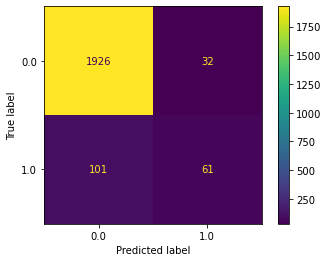

In [38]:
disp = ConfusionMatrixDisplay(confusion_matrix=table,
                              display_labels=clf.classes_)
disp.plot()

In [39]:
(ConfusionMatrixDisplay(table))

In [40]:
acc = sum(table.diagonal())/table.sum()
acc

0.9372641509433962

In [41]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(LL_Feature_9_reshaped,eeg_9_label)

#Predict the response for test dataset
y_pred = clf.predict(LL_Feature_9_reshaped)

In [42]:
print("Accuracy:",accuracy_score(eeg_9_label, y_pred))


Accuracy: 0.9324936314746675


In [43]:
eeg_9_label

array([0., 0., 0., ..., 0., 0., 0.])

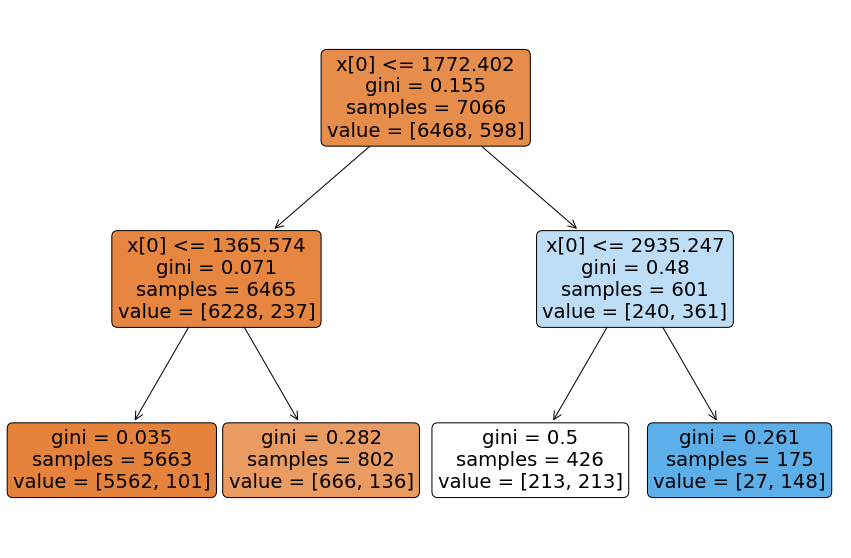

In [44]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, rounded=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

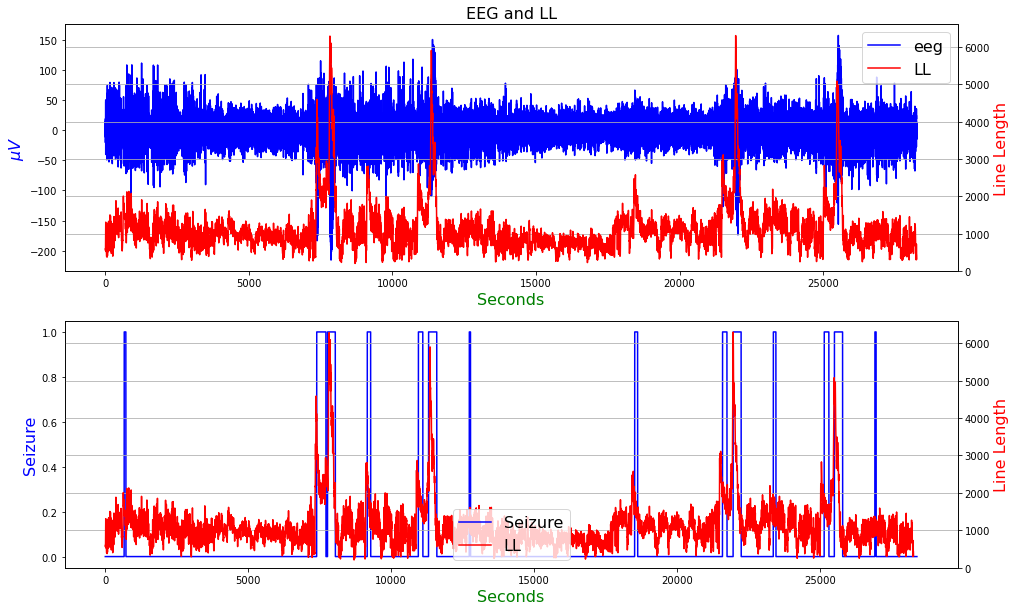

In [45]:
fig,ax = plt.subplots(nrows = 2, ncols = 1, figsize=(16,10))
recordingtime= np.arange(0,len(eeg_9),1)/32 
eeg_trace = ax[0].plot(recordingtime, eeg_9['value'],color='blue',label='eeg 9') # Plot EEG Data
ax[0].set_ylabel('$\mu V$',color='blue',fontsize=16) 
ax[0].set_xlabel('Seconds',color='green',fontsize=16) 
ax2 = ax[0].twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
features = ax2.plot(featuretime, LL_Feature_9,color='red',label='LL') # Plot Annotation data.
ax2.set_ylabel('Line Length', fontsize=16, color='red') 
ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
ax2.grid() # Plot a grid for the right hand y axis.
ax2.legend(eeg_trace + features, ['eeg','LL'], fontsize=16, loc='best') 
ax[0].set_title('EEG and LL',fontsize=16) 

annotations = ax[1].plot(eeg_9_label_combined['value'],color='blue',label='Seizure') # Plot EEG Data
ax[1].set_ylabel('Seizure',color='blue',fontsize=16) 
ax[1].set_xlabel('Seconds',color='green',fontsize=16) 
ax2 = ax[1].twinx() # Create a second y axis on the right hand side of the plot using the same x axis.
features = ax2.plot(featuretime, LL_Feature_9,color='red',label='LL') # Plot Annotation data.
ax2.set_ylabel('Line Length', fontsize=16, color='red') 
ax2.set_ylim(bottom=0) # Limit the right-hand y axis to start at 0.
ax2.grid() # Plot a grid for the right hand y axis.
ax2.legend(annotations + features, ['Seizure','LL'], fontsize=16, loc='lower center')

plt.show